In [ ]:
from sklearn import datasets
boston_house_prices=datasets.load_boston()

In [ ]:
print(boston_house_prices.keys())
print(boston_house_prices.data.shape)
print(boston_house_prices.feature_names)

In [ ]:
print(boston_house_prices.DESCR)

In [ ]:
import pandas as pd
data=pd.DataFrame(boston_house_prices.data)
data.tail()

In [ ]:
data.columns=boston_house_prices.feature_names
data.tail()

In [ ]:
data['Price']=boston_house_prices.target
data.tail()

In [ ]:
data.corr()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data=data.corr(),fmt='.2f',annot=True,linewidths=.5,cmap='Blues')

In [ ]:
import matplotlib.pylab as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
data.plot(kind='scatter',x='RM',y='Price',figsize=(5,5),color='black',xlim=(4,8),ylim=(10,45))

In [18]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(data['RM']),y=data['Price'])
prediction=linear_regression.predict(X=pd.DataFrame(data['RM']))
print('a value:',linear_regression.intercept_)
print('b value:',linear_regression.coef_)

a value: -34.67062077643857
b value: [9.10210898]


In [19]:
residuals=data['Price']-prediction
residuals.describe()

count    5.060000e+02
mean     1.899227e-15
std      6.609606e+00
min     -2.334590e+01
25%     -2.547477e+00
50%      8.976267e-02
75%      2.985532e+00
max      3.943314e+01
Name: Price, dtype: float64

In [20]:
SSE=(residuals**2).sum()
SST=((data['Price']-data['Price'].mean())**2).sum()
R_squared=1-(SSE/SST)
print('R_squared:',R_squared)

R_squared: 0.4835254559913341


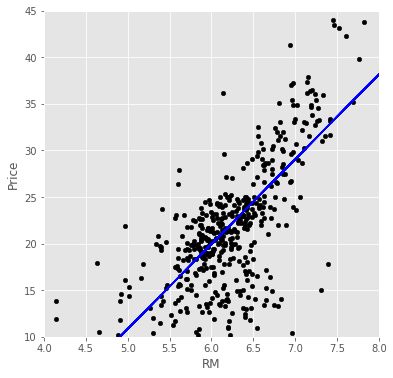

In [21]:
data.plot(kind='scatter',x='RM',y='Price',figsize=(6,6),color='black',xlim=(4,8),ylim=(10,45))
plt.plot(data['RM'],prediction,color='b')

In [ ]:
data.plot(kind='scatter',x='B',y='Price',color='black')

In [ ]:
from sklearn import linear_model
linear_regression=linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(data['B']),y=data['Price'])
prediction=linear_regression.predict(X=pd.DataFrame(data['B']))
print('기울기',linear_regression.coef_)
print('y절편',linear_regression.intercept_)

In [ ]:
residuals=data['Price']-prediction
residuals.describe()

In [ ]:
SSE=(residuals**2).sum()
SST=((data['Price']-data['Price'].mean())**2).sum()
R_squared=1-SSE/SST
print('R_squared:',R_squared)

In [ ]:
data.plot(kind='scatter',x='B',y='Price',figsize=(6,6),color='black')
plt.plot(data['B'],prediction,color='b')

In [ ]:
import numpy as np
X=np.arange(20).reshape(10,2)
y=np.arange(0,10)
print(X)
print(y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,shuffle=False,random_state=1004)
print('X_train shape:',X_train.shape)
print('X_train shape:',X_train)
print('X_test shape:',X_test.shape)
print('X_test shape:',X_test)
print('y_train shape:',y_train.shape)
print('y_train shape:',y_train)
print('y_test shape:',y_test.shape)
print('y_test shape:',y_test)

In [ ]:
from sklearn.datasets import load_boston
boston=load_boston()
dfX=pd.DataFrame(boston.data, columns=boston.feature_names)
dfy=pd.DataFrame(boston.target, columns=['MEDV'])
boston_df = pd.concat([dfX,dfy],axis=1)
print('train shape:',boston_df.shape)
print('X shape:',dfX.shape)
print('y shape:',dfy.shape)

boston_df

In [ ]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(boston_df,test_size=0.3,random_state=0)
print(df_train.shape, df_test.shape)
df_train

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(dfX,dfy,test_size=0.3,random_state=0)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

In [ ]:
X1_train,X1_valid,y1_train,y1_valid=train_test_split(X_train,y_train,test_size=0.2,random_state=0)
X1_train.shape,y1_train.shape,X1_valid.shape,y1_valid.shape,X_test.shape,y_test.shape

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse=mean_squared_error(data['Price'],prediction)
print(mse)
rmse=sqrt(mse)
print(rmse)

43.60055177116956
6.603071389222561


None값 처리

In [23]:
import pandas as pd
df=pd.DataFrame(data={"a":[1,2,3,None],'b':[4,5,None,6],'c':[None,None,7,8]})
df

,a,b,c
0,1.0,4.0,NaN
1,2.0,5.0,NaN
2,3.0,NaN,7.0
3,NaN,6.0,8.0


In [28]:
df_0=df.fillna(0)
df_0

,a,b,c
0,1.0,4.0,0.0
1,2.0,5.0,0.0
2,3.0,0.0,7.0
3,0.0,6.0,8.0


In [35]:
df1=df.fillna(method='bfill')
df2=df.fillna(method='ffill')
print(df)
print(df1)
print(df2)

     a    b    c
0  1.0  4.0  NaN
1  2.0  5.0  NaN
2  3.0  NaN  7.0
3  NaN  6.0  8.0
     a    b    c
0  1.0  4.0  7.0
1  2.0  5.0  7.0
2  3.0  6.0  7.0
3  NaN  6.0  8.0
     a    b    c
0  1.0  4.0  NaN
1  2.0  5.0  NaN
2  3.0  5.0  7.0
3  3.0  6.0  8.0


In [31]:
a=df.fillna(df.mean()) #전체적
b=df.where(pd.notnull(df),df.mean(),axis='columns') #columns의 NaN값
print(df)
print(a)
print(b)

     a    b    c
0  1.0  4.0  NaN
1  2.0  5.0  NaN
2  3.0  NaN  7.0
3  NaN  6.0  8.0
     a    b    c
0  1.0  4.0  7.5
1  2.0  5.0  7.5
2  3.0  5.0  7.0
3  2.0  6.0  8.0
     a    b    c
0  1.0  4.0  7.5
1  2.0  5.0  7.5
2  3.0  5.0  7.0
3  2.0  6.0  8.0
